# Custemer Segmentation Using Kmeans Clustering

### Step 1- Import Libraries

In [41]:
#Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
pwd

'C:\\Users\\ACER\\Python_PG_18\\ML\\Projects\\K-means clustering'

In [8]:
#Importing the dataset
df = pd.read_csv(r'C:\Users\ACER\Downloads\Mall_Customers.csv', index_col=0, header=0)
df
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


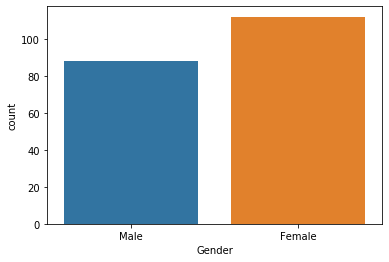

In [9]:
# count plot on single categorical variable
sns.countplot(x = 'Gender', data = df)
#show the plot
plt.show()

In [10]:
df['Gender'].value_counts() #to count category cout

Female    112
Male       88
Name: Gender, dtype: int64

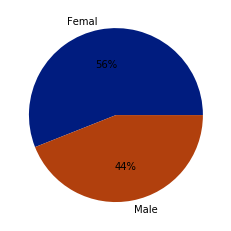

In [11]:
#declearing data
data = [112, 88]
keys = ['Femal','Male']

#declaring exploding pie
explode = [0,0]

#define seaborn color palette to use
palette_color = sns.color_palette('dark')

#plotting data on chart
plt.pie(data, labels=keys, colors=palette_color, explode=explode, autopct='%.0f%%')

#displaying chart
plt.show()

- Pie chart for Gender

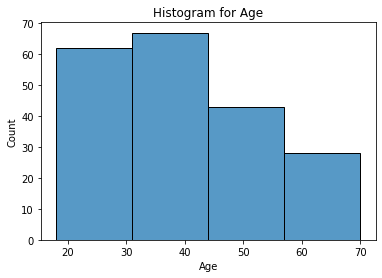

In [30]:
#Plot histogram
sns.histplot(data = df, x='Age', bins=4, kde = False)
color = 'green'
plt.title('Histogram for Age')
plt.show()

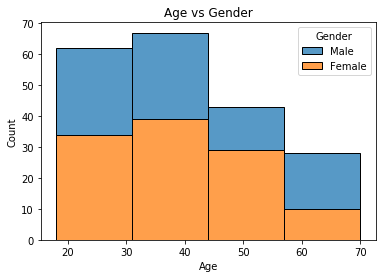

In [21]:

sns.histplot(data = df, x='Age', bins=4, multiple='stack', hue='Gender', kde = False)
plt.title('Age vs Gender')
plt.show()

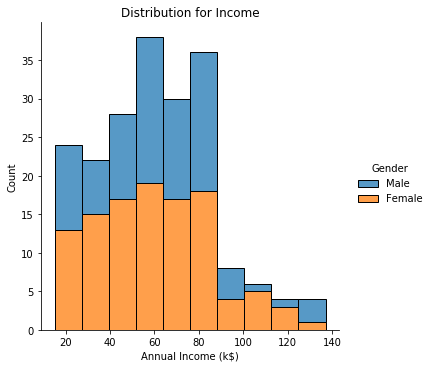

In [31]:
sns.displot(df, x='Annual Income (k$)', multiple='stack', hue='Gender' )
plt.title('Distribution for Income')
plt.show()

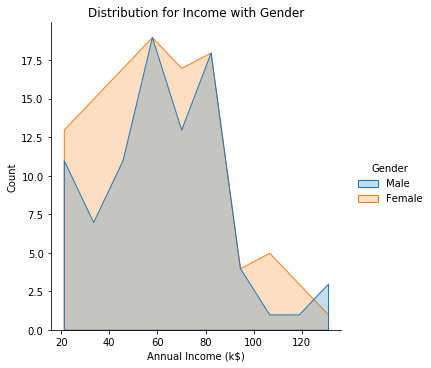

In [32]:
sns.displot(df, x='Annual Income (k$)', element='poly', hue='Gender' )
plt.title('Distribution for Income with Gender')
plt.show()

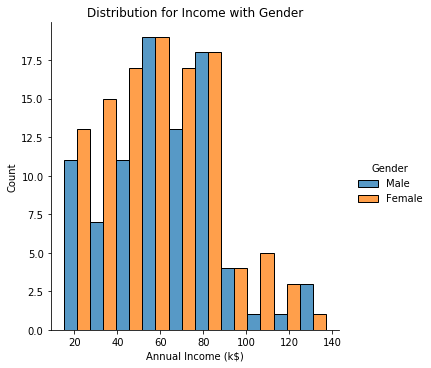

In [34]:
sns.displot(df, x='Annual Income (k$)', multiple='dodge', hue='Gender' )
plt.title('Distribution for Income with Gender')
plt.show()

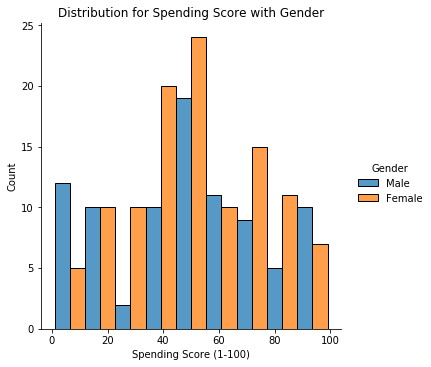

In [35]:
sns.displot(df, x='Spending Score (1-100)', multiple='dodge', hue='Gender' )
plt.title('Distribution for Spending Score with Gender')
plt.show()

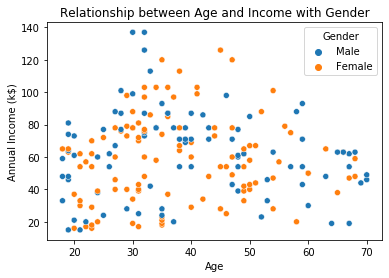

In [36]:
sns.scatterplot(data=df, x='Age', y='Annual Income (k$)', hue='Gender' )
plt.title('Relationship between Age and Income with Gender')
plt.show()

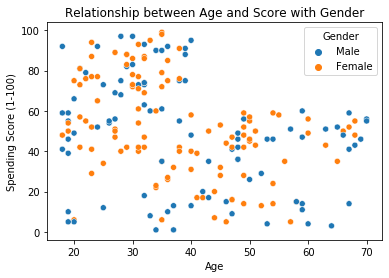

In [37]:
sns.scatterplot(data=df, x='Age', y='Spending Score (1-100)', hue='Gender' )
plt.title('Relationship between Age and Score with Gender')
plt.show()

sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Gender' )
plt.title('Relationship between Income and Score with Gender')
plt.show()

# Data Precessing

In [44]:
print(df.shape)
print(df.info())
print(df.isnull().sum())

(200, 4)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  200 non-null    object
 1   Age                     200 non-null    int64 
 2   Annual Income (k$)      200 non-null    int64 
 3   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 17.8+ KB
None
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [43]:
df.describe(include='all')

,Gender,Age,Annual Income (k$),Spending Score (1-100)
count,200,200.000000,200.000000,200.000000
unique,2,NaN,NaN,NaN
top,Female,NaN,NaN,NaN
freq,112,NaN,NaN,NaN
mean,NaN,38.850000,60.560000,50.200000
std,NaN,13.969007,26.264721,25.823522
min,NaN,18.000000,15.000000,1.000000
25%,NaN,28.750000,41.500000,34.750000
50%,NaN,36.000000,61.500000,50.000000
75%,NaN,49.000000,78.000000,73.000000


In [45]:
df.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)'], dtype='object')

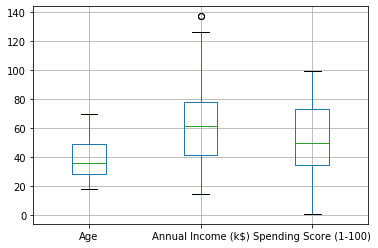

In [46]:
df.boxplot()
plt.show()

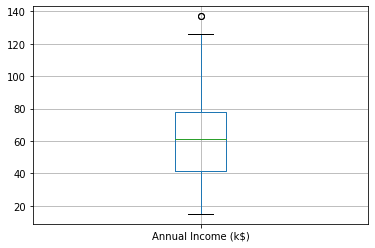

In [47]:
df.boxplot('Annual Income (k$)')
plt.show()

In [48]:
X = df.iloc[:, 2:4] #[start row : stop_row, start_col:stop_col]

In [49]:
X

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [84]:
%%time

#using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
from tqdm import tqdm_notebook as tqdm

K_MAX = 15

wcss = []

# progress bar
with tqdm(total=K_MAX-1) as pbar:
    for i in range (1, K_MAX):
        
        kmeans = KMeans(n_clusters = i, random_state =10)
        kmeans.fit(X)
        wcss.append(kmeans.inertia_)
        pbar.update(1)


Wall time: 815 ms


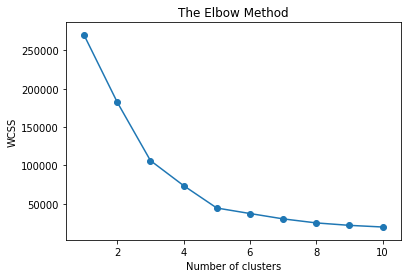

In [78]:
plt.plot(range(1, K_MAX), wcss)
plt.scatter(range(1, K_MAX),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [85]:
print(wcss[4])

44448.45544793371


In [86]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, random_state = 10)
Y_pred = kmeans.fit_predict(X)

In [87]:
Y_pred

array([2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3,
       2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 3, 2, 0,
       2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 4, 1, 0, 1, 4, 1, 4, 1,
       0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 0, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1, 4, 1,
       4, 1])

In [88]:
kmeans.n_iter_

3

In [89]:
df['Clusters']=Y_pred
df.head(10)

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,2
2,Male,21,15,81,3
3,Female,20,16,6,2
4,Female,23,16,77,3
5,Female,31,17,40,2
6,Female,22,17,76,3
7,Female,35,18,6,2
8,Female,23,18,94,3
9,Male,64,19,3,2


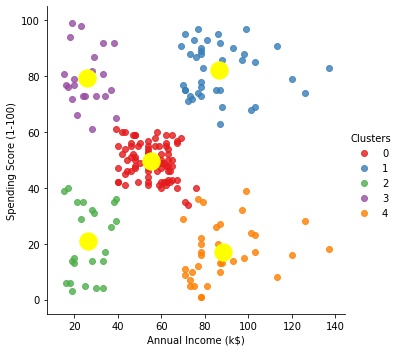

In [92]:
sns.lmplot(data=df,
          x='Annual Income (k$)',
          y='Spending Score (1-100)',
          fit_reg=False, # No regression line
          hue='Clusters',
          palette='Set1')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1],
           s = 300, c= 'yellow')
plt.show()

In [93]:
df['Clusters']=df.Clusters.map({0:'Careless', 1:'sensible',2:'Target',3:'Notuseful',4:'Careful'})

In [94]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
CustomerID,,,,,
1,Male,19,15,39,Target
2,Male,21,15,81,Notuseful
3,Female,20,16,6,Target
4,Female,23,16,77,Notuseful
5,Female,31,17,40,Target


In [96]:
df.to_csv(r'Targercustomers.csv',index=True)

In [98]:
DATA = pd.read_csv('Targercustomers.csv')

In [99]:
DATA

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters
0,1,Male,19,15,39,Target
1,2,Male,21,15,81,Notuseful
2,3,Female,20,16,6,Target
3,4,Female,23,16,77,Notuseful
4,5,Female,31,17,40,Target
...,...,...,...,...,...,...
195,196,Female,35,120,79,sensible
196,197,Female,45,126,28,Careful
197,198,Male,32,126,74,sensible
198,199,Male,32,137,18,Careful
